In [1]:
import pandas as pd

In [2]:
print("Hello World")

Hello World


In [7]:
df = pd.read_csv("transactions.csv")
print(a)
low_memory=False

                             transaction_id            timestamp     amount  \
0      f2f3b0fc-b7d7-4d85-b682-cbf07ef77c1a  2025-03-06 12:04:00    7746.03   
1      feccbd1e-7752-4452-a44a-901510252561  2025-03-31 01:37:00   45193.04   
2      bc6a480c-e2e1-434d-830c-1cda3f913038  2025-04-29 22:58:00   33029.71   
3      b832aa2c-77f3-4c4f-9697-9776b8d74abb  2025-02-27 14:52:00  35994. 61   
4      0d32c6ef-508e-4f5d-bc64-341a0a9f498d  2025-01-03 22:29:00   32229.73   
...                                     ...                  ...        ...   
99995  ea7e0cb2-fadb-496c-962b-7e54a5cfa1bc  2025-02-03 17:00:00     146.04   
99996  4271c3c0-d3be-49f5-8154-ee60e2a1e582  2025-01-07 14:00:00      56.98   
99997  23574238-9739-4af4-a823-5b699812db4d  2025-05-11 13:00:00     128.34   
99998  38e785ff-e460-419e-af07-595f5c67aaf6  2025-02-02 13:00:00     149.13   
99999  94e5a276-d5ce-40f6-b17c-97885b455bbd  2025-05-09 15:00:00      41.77   

      currency            sender_account          r

C:\Users\arjan\AppData\Local\Temp\ipykernel_17296\220847042.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("transactions.csv")


In [8]:
df.head()
df.dtypes

transaction_id           object
timestamp                object
amount                   object
currency                 object
sender_account           object
receiver_account         object
sender_country           object
sender_municipality      object
receiver_country         object
receiver_municipality    object
transaction_type         object
notes                    object
dtype: object

In [9]:
df.dtypes

transaction_id           object
timestamp                object
amount                   object
currency                 object
sender_account           object
receiver_account         object
sender_country           object
sender_municipality      object
receiver_country         object
receiver_municipality    object
transaction_type         object
notes                    object
dtype: object

In [11]:
# Visar hur många tomma värden det finns i varje kolumn
df.isnull().sum()

transaction_id              0
timestamp                   0
amount                      0
currency                    0
sender_account              0
receiver_account            0
sender_country            500
sender_municipality       500
receiver_country          500
receiver_municipality     500
transaction_type            0
notes                    9982
dtype: int64

In [15]:
# antal transaktioner med negativ summa 
df[df['amount'] < 0]

# Negativa värden är inte alltid fel (t.ex. uttag), men det kan vara bra att flagga.

,transaction_id,timestamp,amount,currency,sender_account,receiver_account,sender_country,sender_municipality,receiver_country,receiver_municipality,transaction_type,notes


In [17]:
# Vi behöver konvertera kolumnen amount till tal (float), men samtidigt vara försiktiga om det finns skräp i datan (t.ex. ord eller tomma rader).

df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [18]:
#  Kolla unika värden i några kolumner (t.ex. land)
df['receiver_country'].value_counts()

# Här kan vi se t.ex. om något land heter "Swede" i stället för "Sweden" – alltså stavfel i data.



Sweden       75391
Germany       5890
Island         951
Norway         914
Estonia        898
             ...  
Nepal           41
Iraq            40
Mongolia        39
Gibraltar       36
Belize          36
Name: receiver_country, Length: 244, dtype: int64

In [20]:
df.columns

Index(['transaction_id', 'timestamp', 'amount', 'currency', 'sender_account',
       'receiver_account', 'sender_country', 'sender_municipality',
       'receiver_country', 'receiver_municipality', 'transaction_type',
       'notes'],
      dtype='object')

In [23]:
# Denna kod Konverteras till datumformat
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [24]:
# skapar en kolumn med bara datum och tid 
df['date_only'] = df['timestamp'].dt.date

In [25]:
# Räknar antal transaktioner per dag 
transactions_per_day = df.groupby('date_only').size()

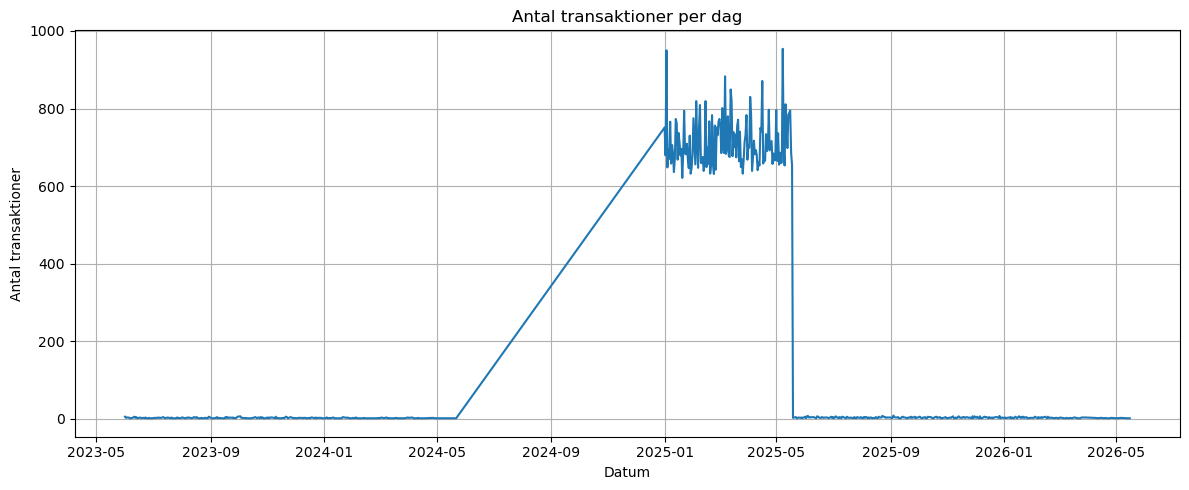

In [58]:
import matplotlib.pyplot as plt
transactions_per_day.plot(kind='line', figsize=(12, 5), title='Antal transaktioner per dag')
plt.xlabel("Datum")
plt.ylabel("Antal transaktioner")
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# filtrera mellan 2024 & 2026 
start_date = pd.to_datetime("2023-01-01")
end_date = pd.to_datetime("2023-06-01")

df_filtered = df[(df['timestamp'] > start_date) & (df['timestamp'] > end_date)]

In [56]:
transactions_per_day = df_filtered.groupby('date_only').size()

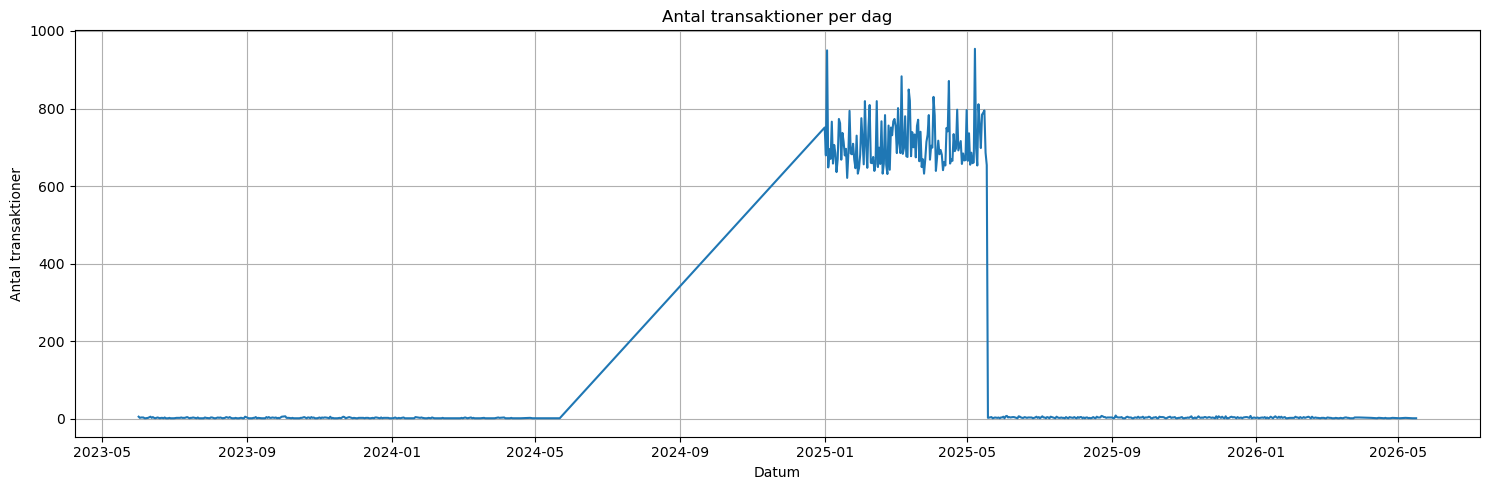

In [57]:
transactions_per_day.plot(kind='line', figsize=(15, 5), title='Antal transaktioner per dag')
plt.xlabel("Datum")
plt.ylabel("Antal transaktioner")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\arjan\AppData\Local\Temp\ipykernel_17296\3691229978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


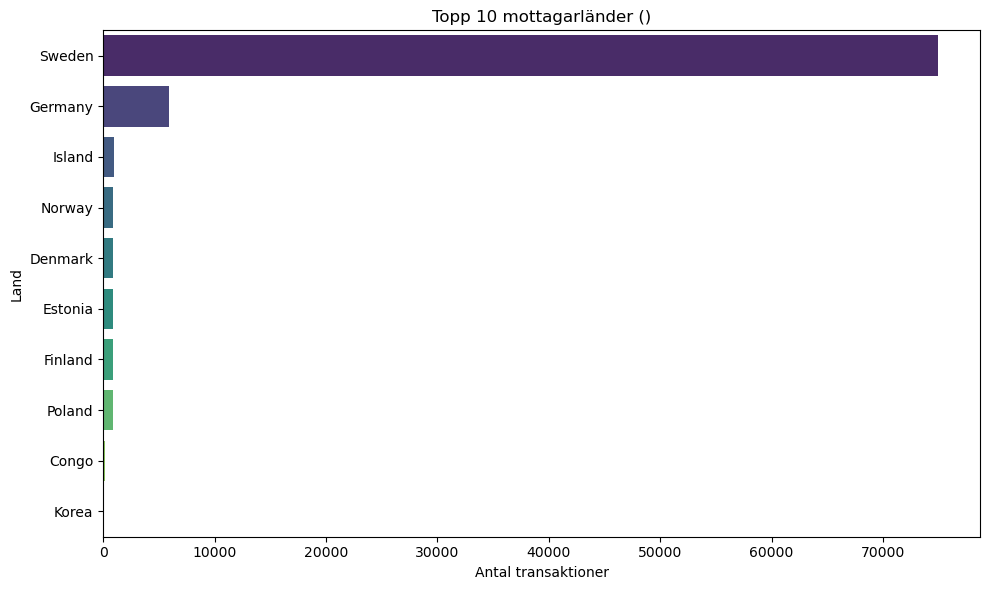

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

plt.title("Topp 10 mottagarländer ()")
plt.xlabel("Antal transaktioner")
plt.ylabel("Land")
plt.tight_layout()
plt.show()

C:\Users\arjan\AppData\Local\Temp\ipykernel_17296\1563766338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_senders.values, y=top_senders.index, palette='mako')


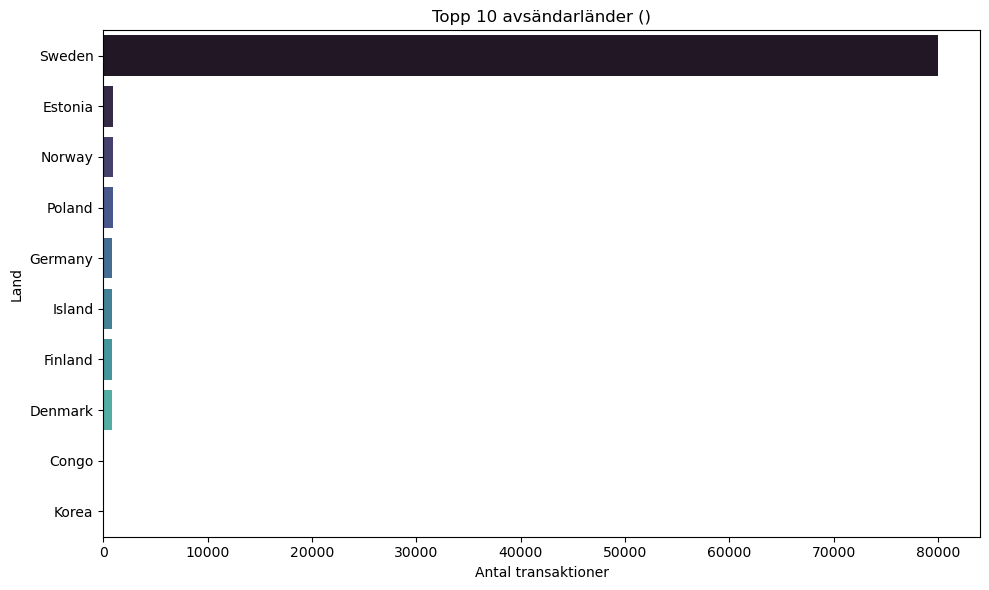

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_senders.values, y=top_senders.index, palette='mako')

plt.title("Topp 10 avsändarländer ()")
plt.xlabel("Antal transaktioner")
plt.ylabel("Land")
plt.tight_layout()
plt.show()